In [ ]:
#######################################################################################
# Author: Srijan Verma                                                              #
# School of Pharmacy                                                                #
# Sirimulla Research Group [http://www.sirimullaresearchgroup.com/]                 #
# The University of Texas at El Paso, TX, USA                                       #
# Last modified: 19/12/2019                                                         #
# Copyright (c) 2019 Srijan Verma and Sirimulla Research Group, under MIT license   #
#######################################################################################

In [1]:
import pandas as pd
from glob import glob
from tqdm import tqdm_notebook


In [27]:
df_all = pd.read_csv('../results/cyp_inhib_results/default_models/merged_cyp_inhib_3968.csv',index_col=0)

In [28]:
df_all.head(2)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_active_size,...,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,Precision_2_Test,Recall_2_Test,F1 Score_2_Test,AUC_output_0_Test,AUC_output_1_Test,AUC_output_2_Test,Log_Loss_Test
0,Cytochrome_P450_11B1,rdk_fp,GaussianNB_default,"{'priors': [None], 'var_smoothing': [1e-09]}",0.002,838,586,126,126,471,...,0.0,0.0,0.0,0.367,0.75,0.493,0.731,0.5,0.723,10.142000000000001
1,Cytochrome_P450_11B1,rdk_fp,KNeighborsClassifier_default,"{'algorithm': ['auto'], 'leaf_size': [30], 'me...",0.017,838,586,126,126,471,...,0.0,0.0,0.0,0.750,0.50,0.600,0.720,0.5,0.730,1.051


In [29]:
unique_all_cyp = list(set(df_all['Output_Target'].tolist()))
unique_all_fp = list(set(df_all['Input_feature'].tolist()))
unique_all_models = list(set(df_all['Models'].tolist()))

print('No. of Unique Cyp: {}'.format(len(unique_all_cyp)))
print('No. of Unique FPs: {}'.format(len(unique_all_fp)))
print('No. of Unique Models: {}'.format(len(unique_all_models)))

No. of Unique Cyp: 22
No. of Unique FPs: 7
No. of Unique Models: 32


In [30]:
act = []
inact = []
indet = []
#Train_indeterminate_size	Val_indeterminate_size	Test_indeterminate_size
for i in tqdm_notebook(range(len(df_all))):
    a = df_all['Train_active_size'][i] + df_all['Val_active_size'][i] + df_all['Test_active_size'][i]
    act.append(a)
    b = df_all['Train_inactive_size'][i] + df_all['Val_inactive_size'][i] + df_all['Test_inactive_size'][i]
    inact.append(b)
    c = df_all['Train_indeterminate_size'][i] + df_all['Val_indeterminate_size'][i] + df_all['Test_indeterminate_size'][i]
    indet.append(c)

In [32]:
df_all.insert(loc=6, column='Active Size', value=act)
df_all.insert(loc=7, column='Inactive Size', value=inact)
df_all.insert(loc=8, column='Indeterminate Size', value=indet)

In [33]:
df_all.head(2)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Active Size,Inactive Size,Indeterminate Size,Train_size,...,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,Precision_2_Test,Recall_2_Test,F1 Score_2_Test,AUC_output_0_Test,AUC_output_1_Test,AUC_output_2_Test,Log_Loss_Test
0,Cytochrome_P450_11B1,rdk_fp,GaussianNB_default,"{'priors': [None], 'var_smoothing': [1e-09]}",0.002,838,673,4,161,586,...,0.0,0.0,0.0,0.367,0.75,0.493,0.731,0.5,0.723,10.142000000000001
1,Cytochrome_P450_11B1,rdk_fp,KNeighborsClassifier_default,"{'algorithm': ['auto'], 'leaf_size': [30], 'me...",0.017,838,673,4,161,586,...,0.0,0.0,0.0,0.750,0.50,0.600,0.720,0.5,0.730,1.051


In [34]:
df_all.to_csv('../results/cyp_inhib_results/default_models/merged_cyp_inhib_3968.csv')

In [35]:
df_all_index_test = df_all.set_index(['Output_Target', 'Input_feature'])

In [36]:
df_columns = df_all.columns.values.tolist()
df_filtered_test = pd.DataFrame(columns = df_columns)
df_filtered_test
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Active Size,Inactive Size,Indeterminate Size,Train_size,...,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,Precision_2_Test,Recall_2_Test,F1 Score_2_Test,AUC_output_0_Test,AUC_output_1_Test,AUC_output_2_Test,Log_Loss_Test


In [37]:
for i in tqdm_notebook((unique_all_cyp)):
    for j in unique_all_fp:
        try:
            
            df = df_all_index_test.loc[i, j]
            df.reset_index(drop=False, inplace=True)
            index = df['Cohen_Score_Test'].idxmax()
            df_filtered_test = df_filtered_test.append(df.iloc[index], ignore_index = True)
            
        except:
            pass

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


In [38]:
len(df_filtered_test)

124

In [39]:
df_filtered_test.to_csv('../results/cyp_inhib_results/default_models/results_124_cyp_inhib_all_fp_best_models_test.csv')

In [40]:
df_all_index_val = df_all.set_index(['Output_Target', 'Input_feature'])

df_columns = df_all.columns.values.tolist()
df_filtered_val = pd.DataFrame(columns = df_columns)
# df_filtered_val
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

for i in tqdm_notebook((unique_all_cyp)):
    for j in unique_all_fp:
        try:
            
            df = df_all_index_val.loc[i, j]
            df.reset_index(drop=False, inplace=True)
            index = df['Cohen_Score_Val'].idxmax()
            df_filtered_val = df_filtered_val.append(df.iloc[index], ignore_index = True)
            
        except:
            pass

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.


In [41]:
df_filtered_val.to_csv('../results/cyp_inhib_results/default_models/results_124_cyp_inhib_all_fp_best_models_val.csv')

In [42]:
len(df_filtered_val)

124

In [43]:
df_columns = df_all.columns.values.tolist()
df_filtered_2_test = pd.DataFrame(columns = df_columns)
df_filtered_2_test
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Active Size,Inactive Size,Indeterminate Size,Train_size,...,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,Precision_2_Test,Recall_2_Test,F1 Score_2_Test,AUC_output_0_Test,AUC_output_1_Test,AUC_output_2_Test,Log_Loss_Test


In [44]:
df_filtered_index_test = df_all.set_index('Output_Target')

In [45]:
for i in tqdm_notebook((unique_all_cyp)):
   # try:

    df = df_filtered_index_test.loc[i]
    df.reset_index(drop=False, inplace=True)
    index = df['Cohen_Score_Test'].idxmax()
    df_filtered_2_test = df_filtered_2_test.append(df.iloc[index], ignore_index = True)

    #except:
     #   pass

In [46]:
len(df_filtered_2_test)

22

In [47]:
df_filtered_2_test.to_csv('../results/cyp_inhib_results/default_models/results_22_cyp_inhib_best_models_test.csv')

In [2]:
df_filtered_2_test = pd.read_csv('../results/cyp_inhib_results/default_models/results_22_cyp_inhib_best_models_test.csv',index_col=0)

In [48]:
df_columns = df_all.columns.values.tolist()
df_filtered_2_val = pd.DataFrame(columns = df_columns)
df_filtered_2_val
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Active Size,Inactive Size,Indeterminate Size,Train_size,...,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,Precision_2_Test,Recall_2_Test,F1 Score_2_Test,AUC_output_0_Test,AUC_output_1_Test,AUC_output_2_Test,Log_Loss_Test


In [49]:
df_filtered_index_val = df_all.set_index('Output_Target')

In [50]:
for i in tqdm_notebook((unique_all_cyp)):
   # try:

    df = df_filtered_index_val.loc[i]
    df.reset_index(drop=False, inplace=True)
    index = df['Cohen_Score_Val'].idxmax()
    df_filtered_2_val = df_filtered_2_val.append(df.iloc[index], ignore_index = True)

    #except:
     #   pass

In [51]:
len(df_filtered_2_val)

22

In [52]:
df_filtered_2_val.to_csv('../results/cyp_inhib_results/default_models/results_22_cyp_inhib_best_models_val.csv')

In [3]:
df_filtered_2_val = pd.read_csv('../results/cyp_inhib_results/default_models/results_22_cyp_inhib_best_models_val.csv',index_col=0)

In [5]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

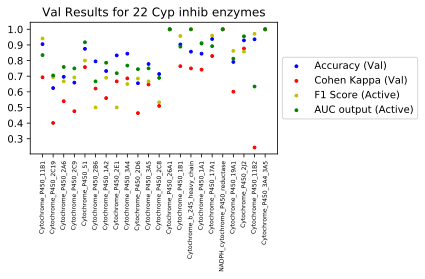

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('Val Results for 22 Cyp inhib enzymes')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=6)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['Accuracy_Val'].tolist(), c='b',s=8, label='Accuracy (Val)')
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['Cohen_Score_Val'].tolist(), c='r',s=8, label='Cohen Kappa (Val)')
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['F1 Score_0_Val'].tolist(), c='y',s=8, label='F1 Score (Active)')
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['AUC_output_0_Val'].tolist(), c='g',s=8, label='AUC output (Active)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/cyp_inhib_results/default_model_graphs/best_model_scores_val.png',dpi=1200)
plt.show()

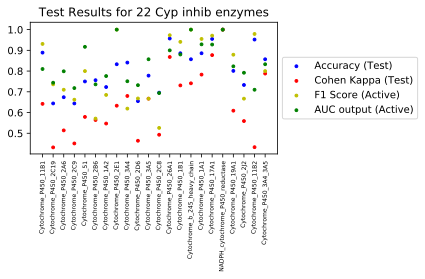

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('Test Results for 22 Cyp inhib enzymes')
plt.rc('xtick',labelsize=6)
plt.xticks(rotation=89)

ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['Accuracy_Test'].tolist(), c='b',s=8, label='Accuracy (Test)')
plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['Cohen_Score_Test'].tolist(), c='r',s=8, label='Cohen Kappa (Test)')
plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['F1_Score_0_Test'].tolist(), c='y',s=8, label='F1 Score (Active)')
plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['AUC_output_0_Test'].tolist(), c='g',s=8, label='AUC output (Active)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/cyp_inhib_results/default_model_graphs/best_model_scores_test.png',dpi=1200)
plt.show()

In [54]:
round(df_filtered_2_val['Active Size'][0]/df_filtered_2_val['Dataset_size'][0],1)

0.8

In [74]:
act_norm_val = []
inact_norm_val = []
ind_norm_val = []
cyp_with_size_val = []
for i in tqdm_notebook(range(len(df_filtered_2_val))):
    a = round(df_filtered_2_val['Active Size'][i]/df_filtered_2_val['Dataset_size'][i],2)
    b = round(df_filtered_2_val['Inactive Size'][i]/df_filtered_2_val['Dataset_size'][i],2)
    c = round(df_filtered_2_val['Indeterminate Size'][i]/df_filtered_2_val['Dataset_size'][i],2)
    
    act_norm_val.append(a)
    inact_norm_val.append(b)
    ind_norm_val.append(c)
    
    cyp_with_size_val.append(df_filtered_2_val['Output_Target'][i]+
                             "=>"+str(df_filtered_2_val['Dataset_size'][i]))
    

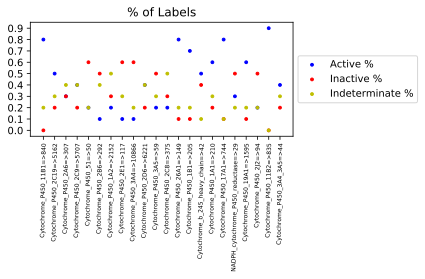

In [67]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('% of Labels')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=6)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(cyp_with_size_val, act_norm_val, c='b',s=8, label='Active %')
plt.scatter(cyp_with_size_val, inact_norm_val, c='r',s=8, label='Inactive %')
plt.scatter(cyp_with_size_val, ind_norm_val, c='y',s=8, label='Indeterminate %')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/cyp_inhib_results/default_model_graphs/label_percentage_in_22_models.png',dpi=1200)
plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('% of Labels')
    plt.rc('xtick',labelsize=6)
    plt.xticks(rotation=89)
    plt.tight_layout()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

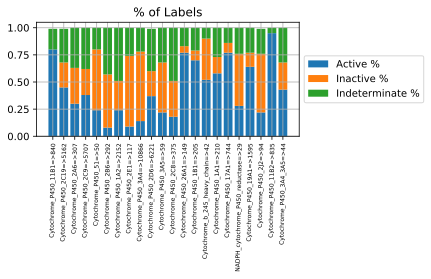

In [82]:
plt.figure(figsize=(6, 4))

series_labels = ['Active %', 'Inactive %','Indeterminate %']

data = [act_norm_val,inact_norm_val,ind_norm_val]

category_labels = cyp_with_size_val

stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False, 
    value_format="{:.1f}",
    y_label=""
)

plt.savefig('../results/cyp_inhib_results/default_model_graphs/cumulated_bargraph_label_percentage_in_22_models.png',dpi=1200)
plt.show()